### Bygg en linjär regressionsmodell som förutsäger dricks (tip) baserat på restaurangnotan (total_bill) med hjälp av Seaborns tips-dataset.

- Ladda datan (antingen via sns.load_dataset eller via en CSV som du sparar i din data/-mapp).

- Utforska datan kort (head, describe, kolla korrelation mellan total_bill och tip).

- Dela upp i X (feature) och y (target).

- Train/test-split.

- Bygga en modell (med eller utan scaling – du väljer).

- Utvärdera modellen (MSE och R²).

- Rita en scatterplot med regression-linjen.

- Göra en prediktion: Hur mycket dricks förväntas på en nota på 50 USD?

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# För skalning och kategoriska variabler
from sklearn.preprocessing import StandardScaler 

In [122]:
df = sns.load_dataset("tips")

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [124]:
df.keys()

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

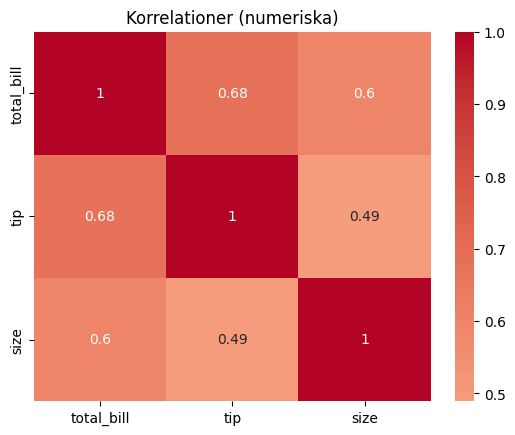

In [125]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Korrelationer (numeriska)")
plt.show()

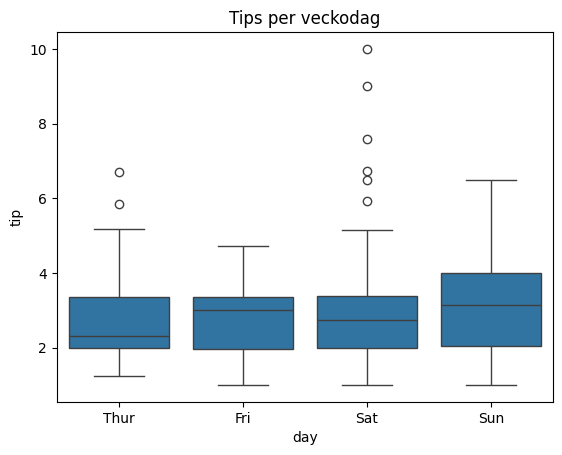

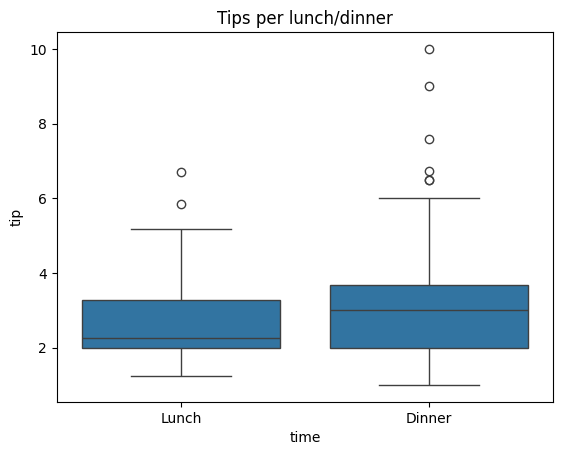

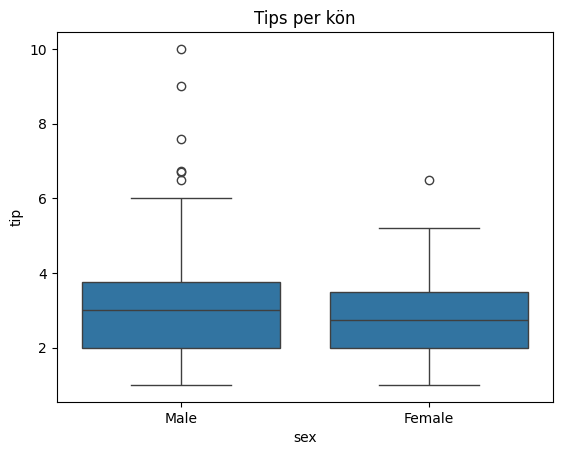

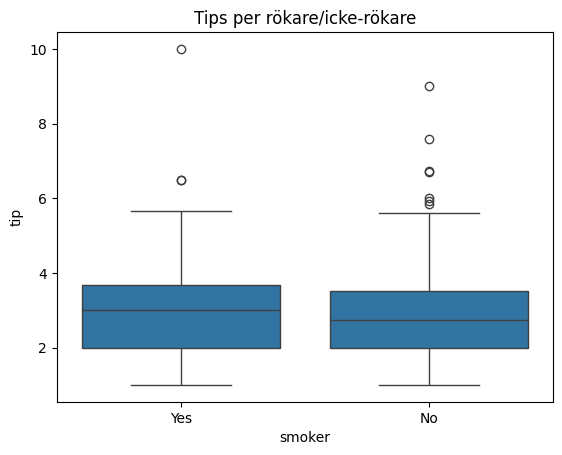

In [126]:
sns.boxplot(x="day", y="tip", data=df)
plt.title("Tips per veckodag")
plt.show()

sns.boxplot(x="time", y="tip", data=df)
plt.title("Tips per lunch/dinner")
plt.show()

sns.boxplot(x="sex", y="tip", data=df)
plt.title("Tips per kön")
plt.show()

sns.boxplot(x="smoker", y="tip", data=df)
plt.title("Tips per rökare/icke-rökare")
plt.show()


In [127]:
df[["tip", "total_bill"]]

,tip,total_bill
0,1.01,16.99
1,1.66,10.34
2,3.50,21.01
3,3.31,23.68
4,3.61,24.59
...,...,...
239,5.92,29.03
240,2.00,27.18
241,2.00,22.67
242,1.75,17.82


In [128]:
X = df[["total_bill", "time", "day", "size"]]
y = df["tip"]

X.head(), y.head()

(   total_bill    time  day  size
 0       16.99  Dinner  Sun     2
 1       10.34  Dinner  Sun     3
 2       21.01  Dinner  Sun     3
 3       23.68  Dinner  Sun     2
 4       24.59  Dinner  Sun     4,
 0    1.01
 1    1.66
 2    3.50
 3    3.31
 4    3.61
 Name: tip, dtype: float64)

In [129]:
# Baseline: bara total_bill
X1 = df[["total_bill"]]
y = df["tip"]

# total_bill + size
X2 = df[["total_bill", "size"]]

# total_bill + size + time
X3 = df[["total_bill", "size", "time"]]


In [130]:
#Train/test-split

X_train, X_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.33, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((163, 1), (81, 1), (163,), (81,))

In [131]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 1) Dela upp kolumner
num_cols = X_train.select_dtypes(include="number").columns
cat_cols = X_train.select_dtypes(exclude="number").columns

# 2) Skala numeriska
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_cols])
X_test_num  = scaler.transform(X_test[num_cols])

# 3) One-hot-koda kategoriska
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_train_cat = encoder.fit_transform(X_train[cat_cols])
X_test_cat  = encoder.transform(X_test[cat_cols])

# 4) Slå ihop till en enda feature-matris
import numpy as np
X_train_prepared = np.hstack([X_train_num, X_train_cat])
X_test_prepared  = np.hstack([X_test_num, X_test_cat])

# 5) Träna modellen
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_prepared, y_train)

y_pred = model.predict(X_test_prepared)

from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))


MSE: 0.7795244566068924
R2 : 0.39917422434566985
